In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

In [2]:
env = gym.make('CartPole-v1')
states = env.observation_space.shape[0]
actions = env.action_space.n
actions

2

In [6]:
scoress = []
episodes = 100
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    while not done:
        env.render()
        action = np.random.choice([0,1])
        n_state, reward, done, trunc, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scoress.append(score)

Episode:1 Score:12.0
Episode:2 Score:25.0
Episode:3 Score:16.0
Episode:4 Score:27.0
Episode:5 Score:17.0
Episode:6 Score:32.0
Episode:7 Score:15.0
Episode:8 Score:16.0
Episode:9 Score:27.0
Episode:10 Score:16.0
Episode:11 Score:11.0
Episode:12 Score:17.0
Episode:13 Score:13.0
Episode:14 Score:17.0
Episode:15 Score:20.0
Episode:16 Score:20.0
Episode:17 Score:21.0
Episode:18 Score:16.0
Episode:19 Score:20.0
Episode:20 Score:11.0
Episode:21 Score:16.0
Episode:22 Score:17.0
Episode:23 Score:37.0
Episode:24 Score:12.0
Episode:25 Score:29.0
Episode:26 Score:22.0
Episode:27 Score:39.0
Episode:28 Score:24.0
Episode:29 Score:11.0
Episode:30 Score:30.0
Episode:31 Score:30.0
Episode:32 Score:46.0
Episode:33 Score:12.0
Episode:34 Score:11.0
Episode:35 Score:27.0
Episode:36 Score:25.0
Episode:37 Score:12.0
Episode:38 Score:34.0
Episode:39 Score:14.0
Episode:40 Score:9.0
Episode:41 Score:35.0
Episode:42 Score:14.0
Episode:43 Score:17.0
Episode:44 Score:20.0
Episode:45 Score:31.0
Episode:46 Score:13.

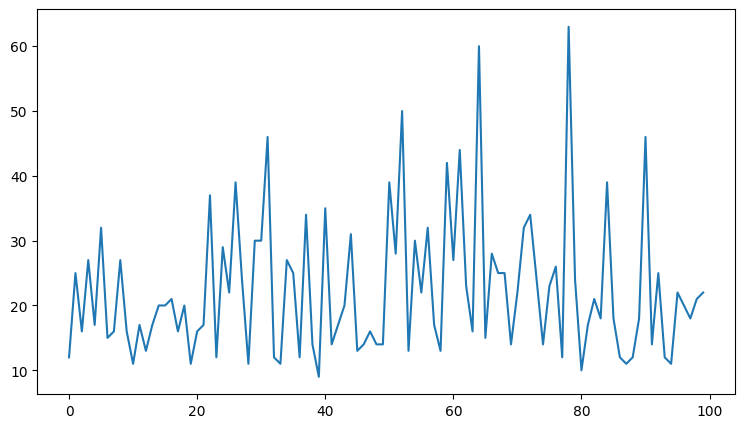

In [7]:
plt.plot(range(episode), scoress)
plt.rcParams["figure.figsize"] = (9, 5)
plt.show()

In [8]:
bins = 10
lr = 0.1
eps = 0.1
gamma = 0.8

In [9]:
# Cart Position, Cart Velocity, Pole Angle (radians), Pole Angular Velocity
# Bounds are:
# Cart Velocity:              (-3.4028235e+38, 3.4028235e+38)         -> (-4 ... 4)
# Pole Angular Velocity:      (-3.4028235e+38, 3.4028235e+38)         -> (-4 ... 4)


env_bounds = list(zip(env.observation_space.low, env.observation_space.high))
env_bounds[1] = [-4.0, 4.0]
env_bounds[3] = [-4.0, 4.0]
q_table = np.zeros(([bins] * len(env_bounds) + [env.action_space.n]))

In [10]:
q_table.shape

(10, 10, 10, 10, 2)

In [11]:
def discretize(state):
    new_state = []
    for i, (state_val, bounds) in enumerate(zip(state, env_bounds)):
        # Normalize
        scaled_state = (state_val - bounds[0]) / (bounds[1]  - bounds[0])
        val = min(bins - 1, max(0, int(scaled_state * bins)))
        new_state.append(val)
    return tuple(new_state)

In [12]:
def choose_action(state):
    # Epsilon greedy
    
    if np.random.random() < eps: # Explore
        return env.action_space.sample()
    return np.argmax(q_table[state]) # Expilot

In [13]:
def update_table(s, a, r, s_prime):
    # The real q-learning part
    current_q = q_table[s + (a,)]
    next_max_q = np.max(q_table[s_prime])
    nexx = gamma * (next_max_q - current_q)
    new_q = current_q + lr * (r + nexx)
    q_table[s + (a,)] = new_q

In [14]:
def runn(N = 4001):
    scores = []
    
    for episode in range(N):
        state = env.reset()[0]
        state = discretize(state)
        episode_reward = 0
        done = False
        truncated = False
        
        while not (done or truncated):
            action = choose_action(state)
            next_state, reward, done, truncated, _ = env.step(action)
            next_state = discretize(next_state)
            episode_reward += reward
            
            update_table(state, action, reward, next_state)
            state = next_state
        
        scores.append(episode_reward)
        
        if episode % 200 == 0:
            avg_score = np.mean(scores[-100:])
            print(f"Episode {episode:4d}, Average Score: {avg_score:2.2f}, Epsilon: {eps:.1f}")
    
    return scores

In [62]:
eps=0.5
s = runn()

Episode    0, Average Score: 15.00, Epsilon: 0.5
Episode  200, Average Score: 28.74, Epsilon: 0.5
Episode  400, Average Score: 33.14, Epsilon: 0.5
Episode  600, Average Score: 46.17, Epsilon: 0.5
Episode  800, Average Score: 42.90, Epsilon: 0.5
Episode 1000, Average Score: 54.57, Epsilon: 0.5
Episode 1200, Average Score: 35.33, Epsilon: 0.5
Episode 1400, Average Score: 35.55, Epsilon: 0.5
Episode 1600, Average Score: 43.21, Epsilon: 0.5
Episode 1800, Average Score: 54.96, Epsilon: 0.5
Episode 2000, Average Score: 44.92, Epsilon: 0.5
Episode 2200, Average Score: 41.83, Epsilon: 0.5
Episode 2400, Average Score: 46.99, Epsilon: 0.5
Episode 2600, Average Score: 48.97, Epsilon: 0.5
Episode 2800, Average Score: 47.13, Epsilon: 0.5
Episode 3000, Average Score: 46.07, Epsilon: 0.5
Episode 3200, Average Score: 47.38, Epsilon: 0.5
Episode 3400, Average Score: 58.31, Epsilon: 0.5
Episode 3600, Average Score: 56.36, Epsilon: 0.5
Episode 3800, Average Score: 39.46, Epsilon: 0.5
Episode 4000, Averag

In [63]:
def test(N=100):
    scores = []
    
    for episode in range(N):
        state = env.reset()[0]
        state = discretize(state)
        episode_reward = 0
        done = False
        truncated = False
        
        while not (done or truncated):
            action = np.argmax(q_table[state])
            next_state, reward, done, truncated, _ = env.step(action)
            next_state = discretize(next_state)
            episode_reward += reward
            state = next_state
        
        scores.append(episode_reward)
    
    return scores, np.mean(scores)

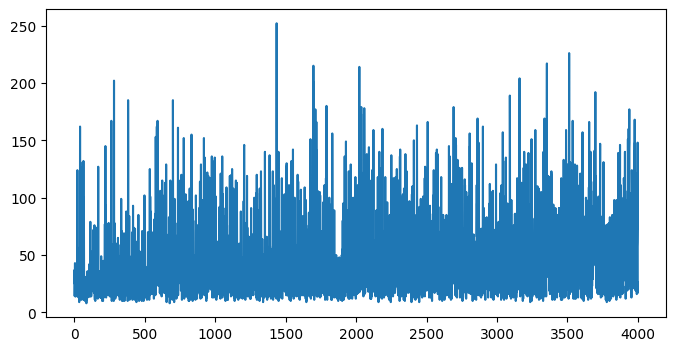

In [64]:
plt.plot(range(4001), s)
plt.rcParams["figure.figsize"] = (30, 20)
plt.show()

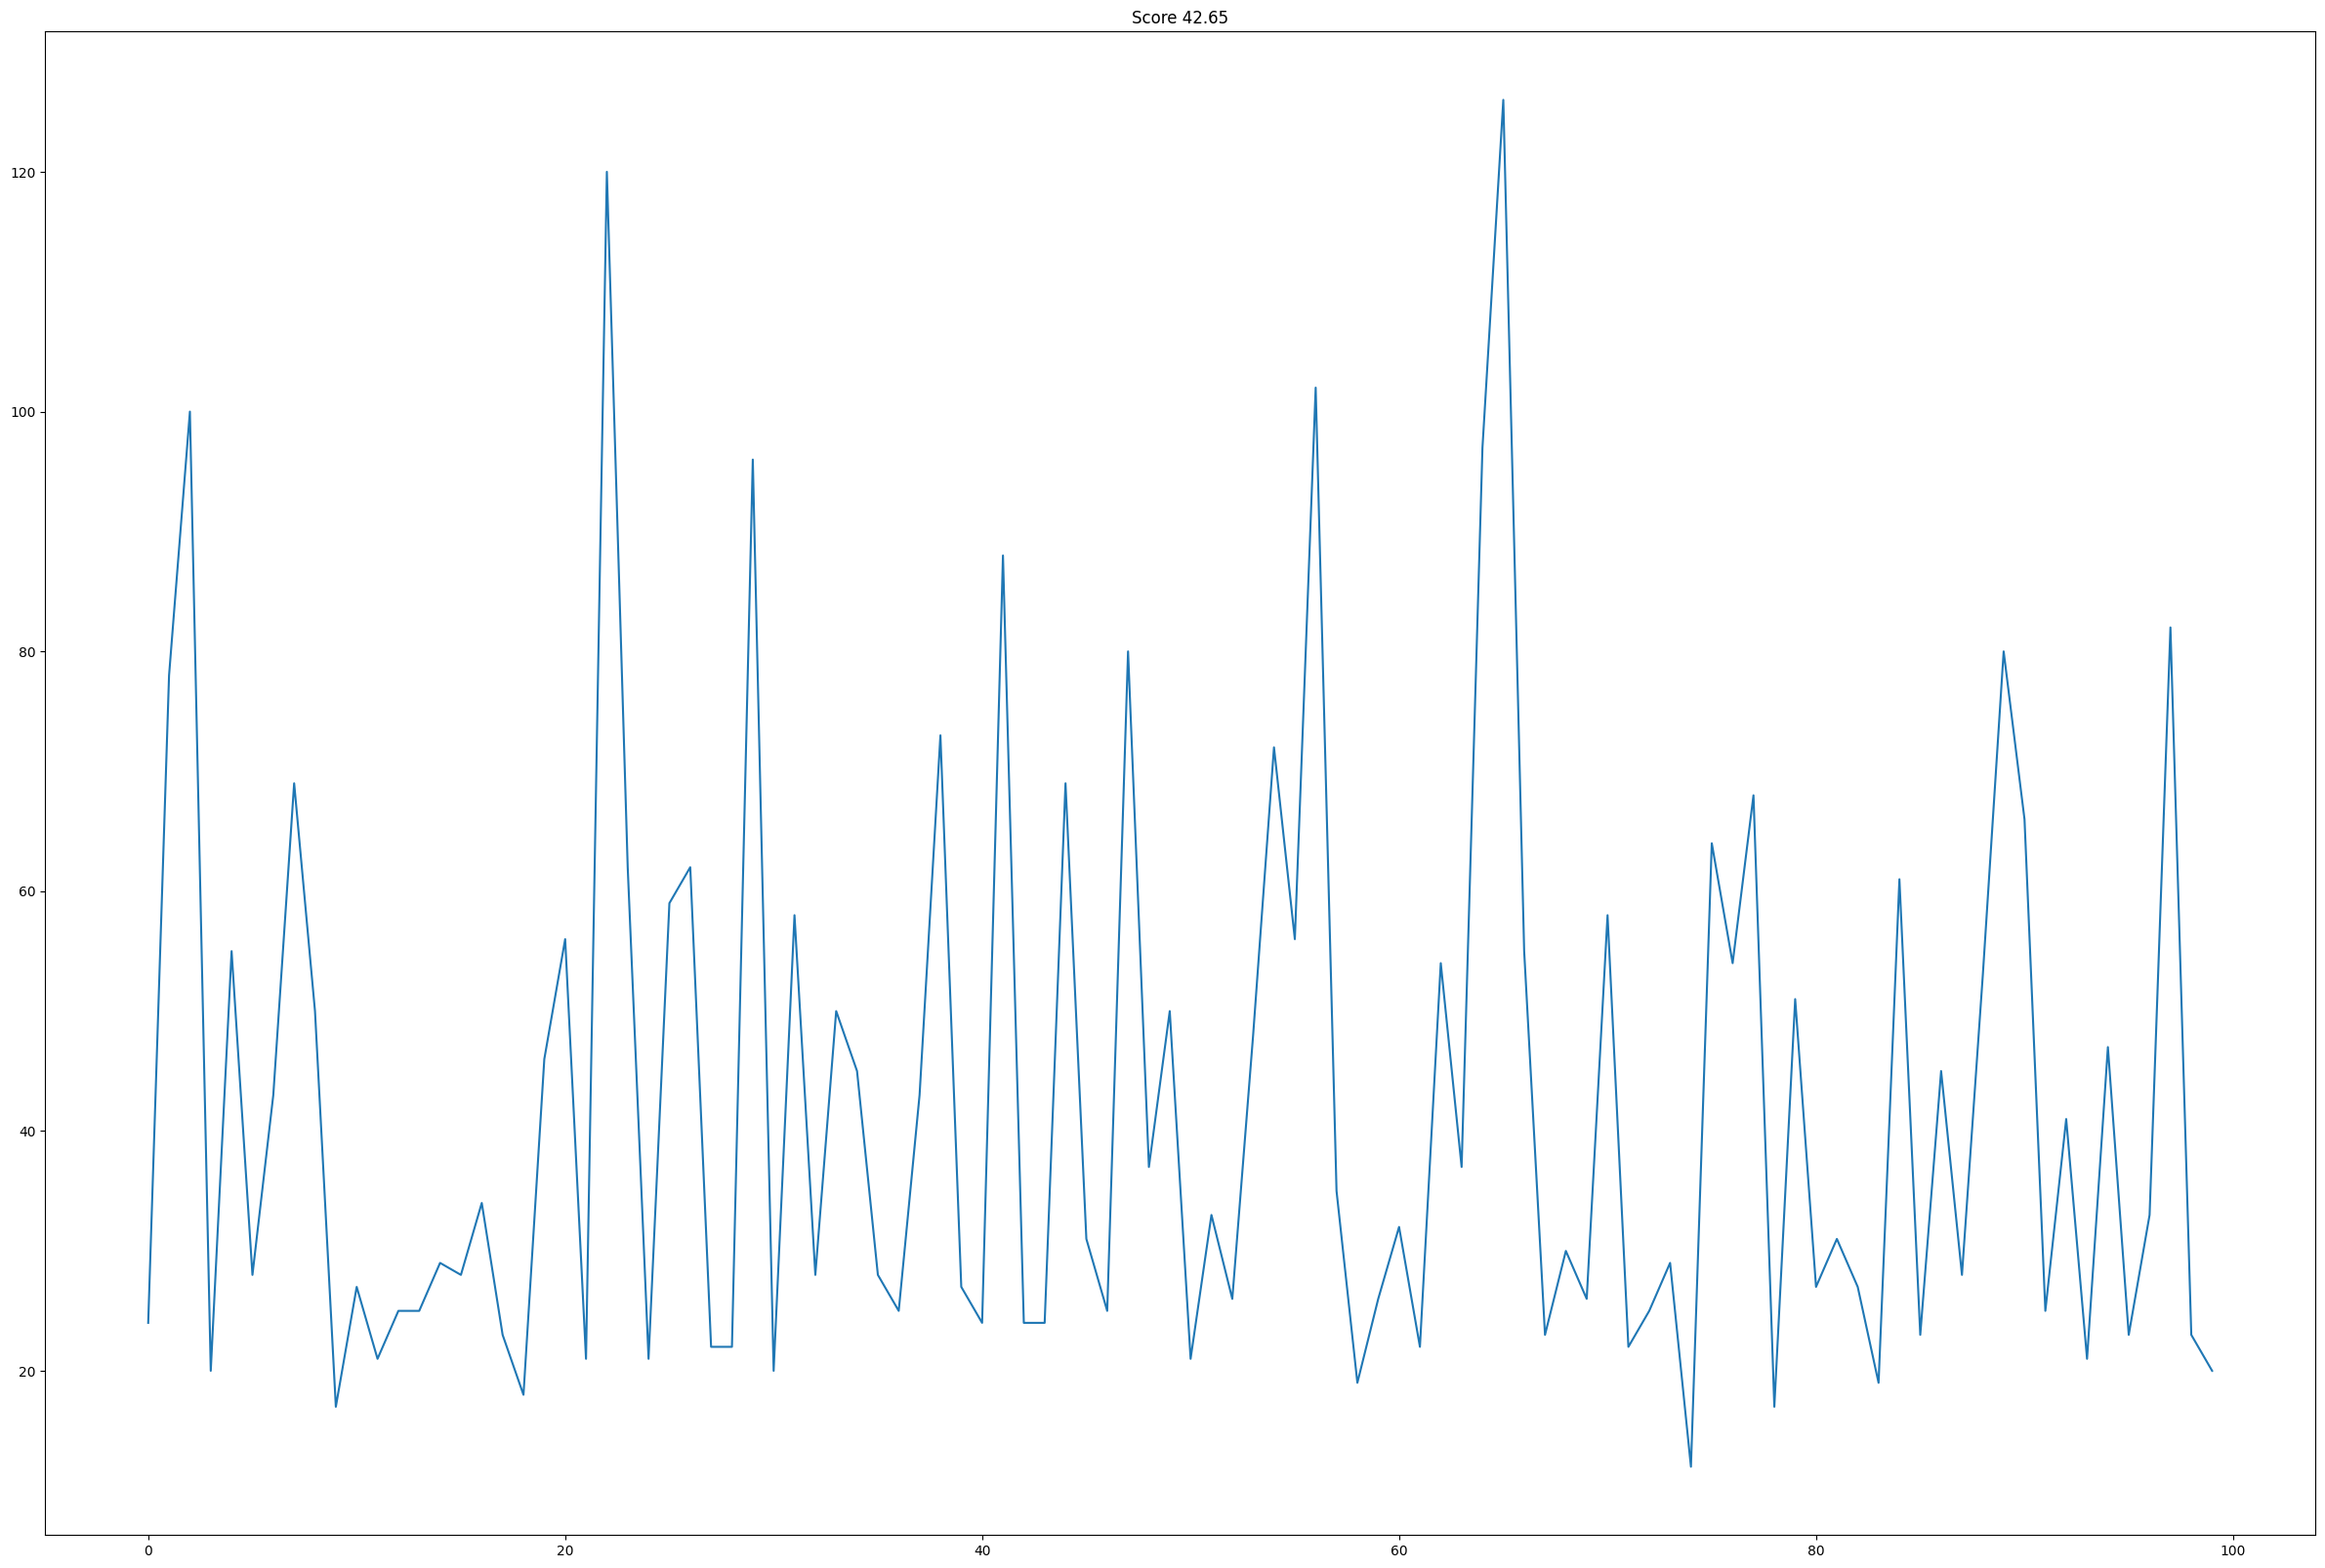

In [65]:
s_list, score = test()
plt.plot(range(len(s_list)), s_list)
plt.rcParams["figure.figsize"] = (8, 4)
plt.title(f"Score {score}")
plt.show()